# Homework 4. Frequent Words and Web scraping

***Double Click here to edit this cell***

- Name: 허성일
- Student ID: 201603727
- Submission date: 2020.05.15

## Problem 1 (15 pts)

- Project Gutenberg is a volunteer effort to digitize and archive cultural works.
- Moby-Dick is an 1851 novel by American writer Herman Melville.
- You can find Moby-Dick in an ordinary text format at https://www.gutenberg.org/files/2701/old/moby10b.txt
- Use **requests** module to get the text.


- We want to compute word frequency of words appearing in mobydick and generate WordCloud
    - First, you must split the text into words. 
    - To do that, **find word delimiters** (for example, . or , ... whatever).
    - To split into words, use **re** (regular expression module)
    - Numbers should not be words. 
    - Null string is not a word. 
    - Any delimiters should not be words.
    - (Upper or lower) Cases does not matter in words

### 1.1 Print top 50 most common words (5 pts)

In [1]:
# YOUR CODE MUST BE HERE
from collections import Counter
import re,requests

moby_dick = requests.get("https://www.gutenberg.org/files/2701/old/moby10b.txt").text

pattern = re.compile('[^a-zA-Z]')

counter = Counter(word.lower()
                 for line in moby_dick.split('\r\n')
                 for word in re.split(pattern,line)
                 if word)

print([(word,count) for word,count in counter.most_common(50)])

[('the', 14512), ('of', 6676), ('and', 6471), ('a', 4774), ('to', 4690), ('in', 4190), ('that', 3095), ('it', 2542), ('his', 2530), ('i', 2128), ('he', 1896), ('but', 1823), ('s', 1811), ('as', 1750), ('is', 1748), ('with', 1729), ('was', 1647), ('for', 1643), ('all', 1537), ('this', 1437), ('at', 1332), ('by', 1232), ('whale', 1228), ('not', 1162), ('from', 1103), ('on', 1077), ('so', 1073), ('him', 1067), ('be', 1058), ('you', 949), ('one', 934), ('there', 870), ('now', 787), ('had', 779), ('have', 773), ('or', 761), ('were', 685), ('they', 669), ('which', 650), ('like', 648), ('me', 634), ('then', 632), ('some', 621), ('what', 620), ('their', 620), ('are', 611), ('when', 608), ('an', 600), ('no', 592), ('my', 589)]


 **Your output should be like the following**:
 ```python
[('the', 14512), ('of', 6676), ('and', 6471), ('a', 4774), ('to', 4690), ('in', 4190), ('that', 3095), ('it', 2542), ('his', 2530), ('i', 2128), ('he', 1896), ('but', 1823), ('s', 1811), ('as', 1750), ('is', 1748), ('with', 1729), ('was', 1647), ('for', 1643), ('all', 1537), ('this', 1437), ('at', 1332), ('by', 1232), ('whale', 1228), ('not', 1162), ('from', 1103), ('on', 1077), ('so', 1073), ('him', 1067), ('be', 1058), ('you', 949), ('one', 934), ('there', 870), ('now', 787), ('had', 779), ('have', 773), ('or', 761), ('were', 685), ('they', 669), ('which', 650), ('like', 648), ('me', 634), ('then', 632), ('some', 621), ('what', 620), ('their', 620), ('are', 611), ('when', 608), ('an', 600), ('no', 592), ('my', 589)]
```

### 1.2 Plot word frequency (5 pts)

- Sort the word frequency in descending order
- Plot the word frequency
- Plot the word frequency in log-log plot.

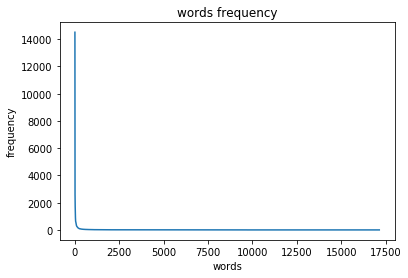

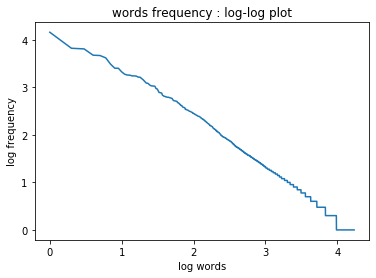

In [2]:
# YOUR CODE MUST BE HERE
from collections import Counter
import matplotlib.pyplot as plt
import re,requests, math

moby_dick = requests.get("https://www.gutenberg.org/files/2701/old/moby10b.txt").text

pattern = re.compile('[^a-zA-Z]')

counter = Counter(word.lower()
                 for line in moby_dick.split('\r\n')
                 for word in re.split(pattern,line)
                 if word)

frequent = [count for word,count in counter.most_common()]

plt.plot(list(range(len(frequent))),frequent)
plt.title("words frequency")
plt.ylabel("frequency")
plt.xlabel("words")
plt.show()

plt.plot([math.log10(x) for x in list(range(1,len(frequent)+1))],[math.log10(y) for y in frequent])
plt.title("words frequency : log-log plot")
plt.ylabel("log frequency")
plt.xlabel("log words")
plt.show()

**Your output should be like**:
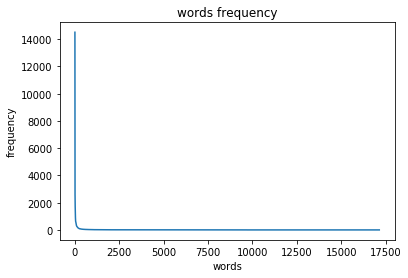

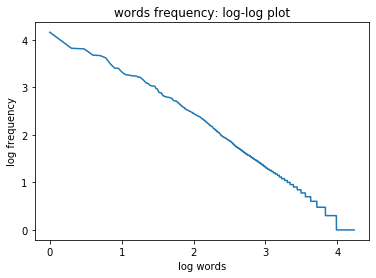

### Discussion

- Read this wikipedia article : https://ko.wikipedia.org/wiki/%EC%A7%80%ED%94%84%EC%9D%98_%EB%B2%95%EC%B9%99)
- Discuss what you learned from the distribution.
- WRITE HERE (To edit, double click this cell)

 가장 주목하게 되는 것은 수학적 통계를 바탕으로 밝혀진 경험적 법칙이라는 점이다. 이것이 단순히 언어학에서 단어의 빈도수에만 적용되는 것이 아니고 물리학, 사회 과학 분야들 다양한 분야에서 지프의 법칙이 적용되는 경향을 보인다고 한다. 어떤 결과를 도출하기 위해서는 타당한 근거가 필요할 수도 있겠지만 타당한 근거가 부족하여도 데이터를 통해서 결과를 도출할 수 있겠다라고 판단된다. 갈수록 많아지는 데이터와 발전되는 데이터 사이언스로 많은 사회 문제들을 해결하기 위해 나와 같이 같은 전공을 가지고 있는 많은 사람들의 노력이 투자 될 것 같다. 그리고 지프의 법칙에 해당하는 하나의 수식이 많은 인간 사회에 적용된다는 점이 매우 신기하다.

### 1.3 Word Cloud (5 pts)

- Print top 10 most words except stop words
- Draw word cloud of top 10 most common words

**Your output should be like**:
```python
[('whale', 1228), ('one', 934), ('like', 648), ('upon', 566), ('man', 527), ('ship', 518), ('ahab', 511), ('ye', 472), ('sea', 455), ('old', 450)]
```
**Your output should be like this (but NOT exactly the the same)**:
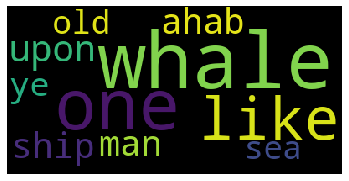

- The following is English stop words list

In [3]:
stopwords = {'it', 'than', 'out', 'an', 'at', 'until', 'wouldn', 'too', 'each', 'off', 'whom', 'not', 'ain', 'weren', "you've", 'isn', 've', "that'll", 'didn', 'couldn', 'with', 'for', 'me', "shouldn't", 'those', 'once', 'them', 'him', 'again', 'what', 'to', 's', 'don', 'yourselves', "she's", 'd', 'we', 'so', 'does', 'your', 'is', 'such', 'hasn', 'doesn', "doesn't", 'no', 'll', 'their', 'before', 'my', 'being', 'and', 'but', 'below', 'won', "don't", 't', 'myself', 'very', 'why', "mustn't", 'that', 'been', 'you', "you'd", 'few', 'other', 'ma', 'any', 'having', 'against', 'into', 'on', 'just', 'herself', "hadn't", "mightn't", 'aren', "wouldn't", 'ours', 'about', 'then', 'mustn', 'i', 'y', 'should', 'all', 'while', 'himself', 'do', 'up', 'were', 'this', 'most', 'when', 'nor', 'from', 'hadn', 'theirs', 'she', 'be', 'under', 'or', 'will', 'through', 'our', "isn't", 'as', 'between', 'had', 'more', "aren't", "weren't", 'if', 'the', 'am', 'how', 'both', "you're", 'yourself', "couldn't", 'only', 'in', 'itself', 'own', "it's", 'because', 'some', "didn't", 'wasn', 'shan', "hasn't", 'mightn', 'shouldn', 'here', 'he', 'where', 'm', 're', 'was', 'after', 'has', 'same', "shan't", 'further', "wasn't", 'down', 'yours', "should've", 'now', "needn't", 'above', 'haven', 'its', 'who', 'of', 'ourselves', 'did', 'these', 'there', 'his', "haven't", "won't", 'themselves', "you'll", 'a', 'are', 'which', 'have', 'by', 'during', 'can', 'hers', 'over', 'her', 'doing', 'o', 'needn', 'they'}

[('whale', 1228), ('one', 934), ('like', 648), ('upon', 566), ('man', 527), ('ship', 518), ('ahab', 511), ('ye', 472), ('sea', 455), ('old', 450)]


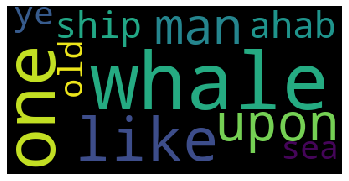

In [4]:
# YOUR CODE MUST BE HERE
from collections import Counter
import matplotlib.pyplot as plt
import re,requests
from wordcloud import WordCloud

moby_dick = requests.get("https://www.gutenberg.org/files/2701/old/moby10b.txt").text


pattern = re.compile('[^a-zA-Z]')

counter = Counter(word.lower()
                 for line in moby_dick.split('\r\n')
                 for word in re.split(pattern,line)
                 if word)

for key in counter.keys() & stopwords:
    del counter[key]

wordcloud = WordCloud(max_words=10)
wordcloud = wordcloud.generate_from_frequencies(counter)

print(counter.most_common(10))

fig = plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Problem 2 (20 pts)

- We want to find how many CS faculty members at CS department of Stanford Univ work on CS research areas.
- First, visit https://cs.stanford.edu/research
- Take a look at the source html of the web page.
- We want to scrape data on all the faculty members
- Run the following two cells and see what happens
- If necessary, install html5lib

In [5]:
from bs4 import BeautifulSoup
import requests

url = "https://cs.stanford.edu/research?items_per_page=All&field_faculty_status_value=active"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

In [6]:
print(soup.tbody.prettify())

<tbody>
 <tr>
  <td class="views-field views-field-field-faculty-photo views-align-center border-simple">
   <a href="https://profiles.stanford.edu/maneesh-agrawala" target="_blank">
    <img alt="" height="158" src="https://cs.stanford.edu/sites/default/files/styles/faculty_profile/public/maneesh.jpeg?itok=sb_Xu2fp" typeof="foaf:Image" width="110"/>
   </a>
  </td>
  <td class="views-field views-field-title fac_prof_view_name">
   <a href="https://profiles.stanford.edu/maneesh-agrawala" target="_blank">
    Maneesh Agrawala
   </a>
  </td>
  <td class="views-field views-field-field-faculty-title fac_prof_view_title">
   Professor
  </td>
  <td class="views-field views-field-field-research-focus fac_prof_view_focus">
   Computer Graphics
   <br/>
   Human-Computer Interaction (HCI)
  </td>
 </tr>
 <tr>
  <td class="views-field views-field-field-faculty-photo views-align-center border-simple">
   <a href="http://theory.stanford.edu/~aiken/" target="_blank">
    <img alt="" height="158" 

### Draw bar charts on research area contributions of Stanford CS faculty

- The followings are research fields
```python
['Architecture', 'Artificial Intelligence', 'Computational Biology', 'Computer Graphics', 'Computer Security', 'Computer Systems', 'Computer Vision', 'Data Science', 'Education', 'Human-Computer Interaction (HCI)', 'Machine Learning', 'Natural Language Processing', 'Networking', 'Operating/Distributed Systems', 'Programming Systems and Verification', 'Robotics', 'Theory']
```

- In plotting, use the following abbreviations:

```
['ARC', 'AI', 'BIO', 'CG', 'SEC', 'SYS', 'VIS', 'DS', 'EDU', 'HCI', 'ML', 'NLP', 'NET', 'ODS', 'PS', 'ROB', 'TH']
```

- For each research area, we want to compute how many professors works on that area.
- If one professor works on n research fields, the contribution to one research field is 1/n.
- The colors for professor ranks (assistant, associate, full professors) may be your own choice.
- Your output should be like:

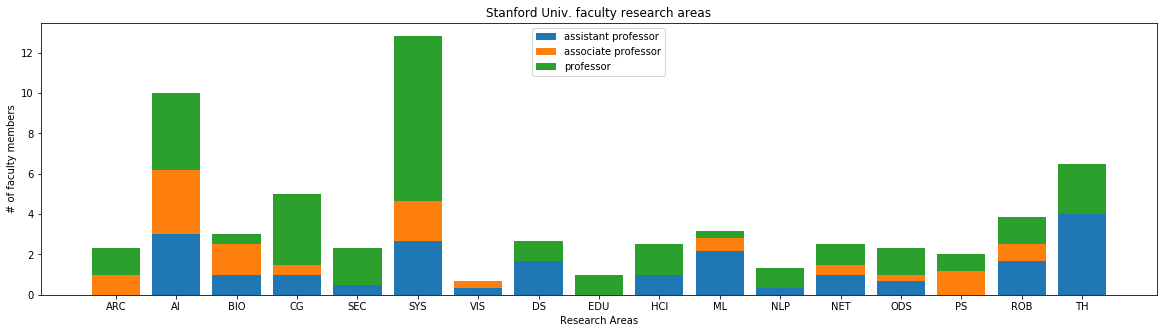

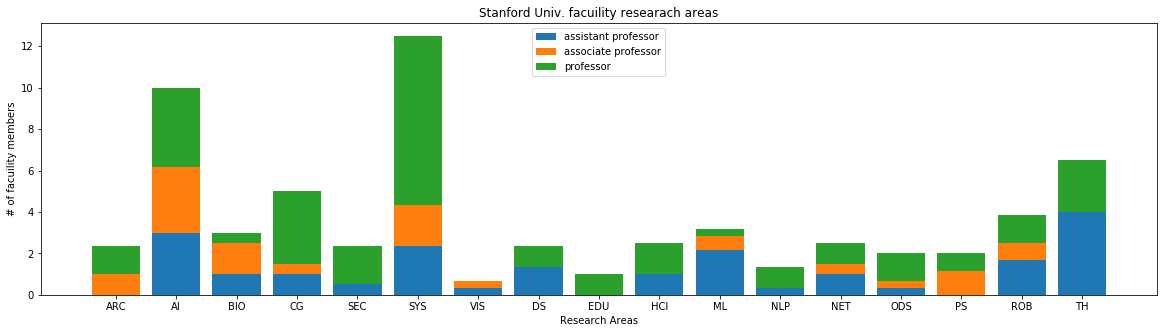

In [7]:
# YOUR CODE MUST BE HERE
import numpy as np
import pandas as pd

td=soup.tbody.find_all('td')

data=[x for line in td
        for x in line.get_text('\n').strip().split('\n')]
L,x=[],[]
for i in data:
    if i: #있으면
        L.append(i)
    else:
        x.append(L)
        L=[]
x.pop(0)

for i in range(len(x)):
    x[i][2:] = [[k,1/(len(x[i])-2)] for k in x[i][2:]]

major = ['Architecture', 'Artificial Intelligence', 'Computational Biology',
         'Computer Graphics', 'Computer Security', 'Computer Systems', 
         'Computer Vision', 'Data Science', 'Education',
         'Human-Computer Interaction (HCI)', 'Machine Learning', 'Natural Language Processing',
         'Networking', 'Operating/Distributed Systems', 'Programming Systems and Verification', 
         'Robotics', 'Theory']
major_count0=dict()
major_count1=dict()
major_count2=dict()

for data in major:
    major_count0[data]=0
    major_count1[data]=0
    major_count2[data]=0

for i in range(len(x)):
    if x[i][1] == 'Professor':
        for key,value in x[i][2:]:
            major_count0[key] += value
    elif x[i][1] == 'Associate Professor':
        for key,value in x[i][2:]:
            major_count1[key] += value
    elif x[i][1] == 'Assistant Professor':
        for key,value in x[i][2:]:
            major_count2[key] += value
    else:
        print("error")

professor = list(major_count0.values())
associate_professor = list(major_count1.values())
assistant_professor = list(major_count2.values())

x = ['ARC', 'AI', 'BIO', 'CG', 'SEC', 'SYS', 'VIS', 'DS', 
     'EDU', 'HCI', 'ML', 'NLP', 'NET', 'ODS', 'PS', 'ROB', 'TH']
plt.figure(figsize=(20,5))  #전체 크기
plt.bar(x, assistant_professor)
plt.bar(x, associate_professor, bottom = assistant_professor)
plt.bar(x, professor, bottom = np.array(assistant_professor)+np.array(associate_professor))
plt.title("Stanford Univ. facuility researach areas")
plt.ylabel("# of facuility members")
plt.xlabel("Research Areas")
plt.legend(["assistant professor","associate professor","professor"],loc=9)
plt.show()

## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit
- Run **all cells**
- Goto "File -> Print Preview"
- Print the page as pdf
- Submit the pdf file in google classroom
- No late homeworks accepted
- Your homework will be graded on the basis of correctness and programming skills